11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8128 - loss: 0.6103 - val_accuracy: 0.9605 - val_loss: 0.1271
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9467 - loss: 0.1693 - val_accuracy: 0.9705 - val_loss: 0.1009
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1146 - val_accuracy: 0.9712 - val_loss: 0.0981
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.1004 - val_accuracy: 0.9747 - val_loss: 0.0837
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0866 - val_accuracy: 0.9732 - val_loss: 0.0933
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0721 - val_accuracy: 0.9762 - val_loss: 0.0771
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0674 - val_accuracy: 0.9760 - val_loss: 0.0826
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9794 - loss: 0.0631 - val_accuracy: 0.

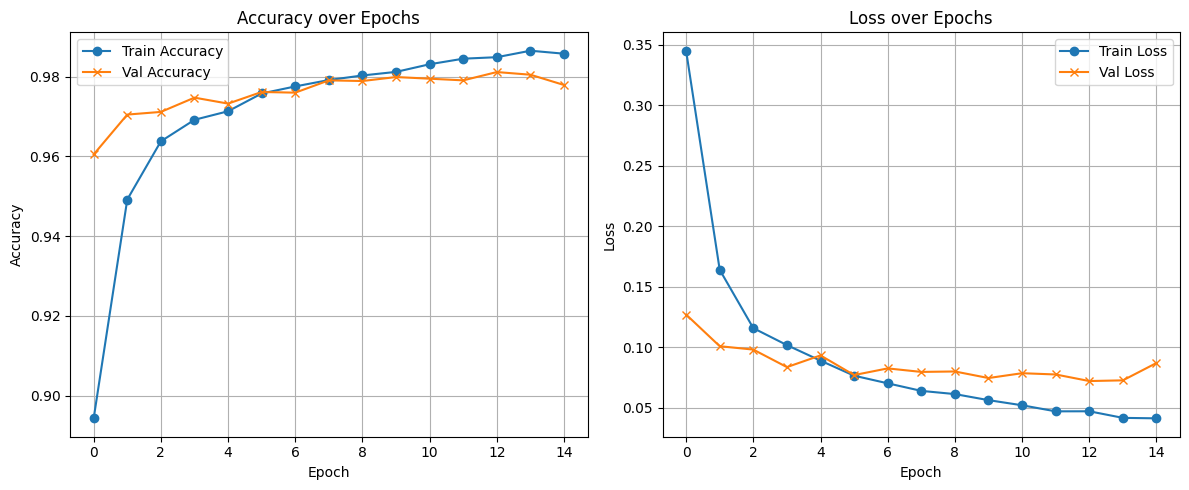


✅ Final Test Accuracy: 98.01%


In [1]:

# ✅ 1. Dataset Loading
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ✅ 2. Preprocessing
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ✅ 3. Model Architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# ✅ 4. Compile and Train
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ✅ 5. Visualization
# Plot training vs. validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Optional: Plot training vs. validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ✅ 6. Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_accuracy * 100:.2f}%")
